In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# 필요 라이브러리 불러오기
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt

# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
!apt-get -qq install fonts-nanum


fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

Selecting previously unselected package fonts-nanum.
(Reading database ... 120874 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
df2 = pd.read_csv('/content/fulldata_01_01_04_P_산후조리업.csv', encoding='cp949')
df2['시'] = df2['소재지전체주소'].str.split(' ', n=1).str[0]
df2['시'] = df2['시'].replace(['경상남도', '경상북도'], '경상도')
df2['시'] = df2['시'].replace(['전라남도', '전라북도'], '전라도')
df2['시'] = df2['시'].replace(['충청남도', '충청북도'], '충청도')
total_count = df2.groupby('시')['영업상태명'].count().reset_index(name='전체 수')
closed_count = df2[df2['영업상태명'] == '폐업'].groupby('시')['영업상태명'].count().reset_index(name='폐업 수')
merged_df2 = pd.merge(total_count, closed_count, on='시')
merged_df2['폐업률(%)'] = (merged_df2['폐업 수'] / merged_df2['전체 수']) * 100

merged_df2

,시,전체 수,폐업 수,폐업률(%)
0,강원특별자치도,26,9,34.615385
1,경기도,248,126,50.806452
2,경상도,79,47,59.493671
3,광주광역시,13,4,30.769231
4,대구광역시,37,20,54.054054
5,대전광역시,26,19,73.076923
6,부산광역시,47,24,51.063830
7,서울특별시,200,101,50.500000
8,세종특별자치시,7,1,14.285714
9,울산광역시,8,4,50.000000


In [ ]:
col_list2 = list(merged_df2.columns)
col_list2[3] = 'rateClosed'
merged_df2.columns = col_list2

merged_df2

,시,전체 수,폐업 수,rateClosed
0,강원특별자치도,26,9,34.615385
1,경기도,248,126,50.806452
2,경상도,79,47,59.493671
3,광주광역시,13,4,30.769231
4,대구광역시,37,20,54.054054
5,대전광역시,26,19,73.076923
6,부산광역시,47,24,51.063830
7,서울특별시,200,101,50.500000
8,세종특별자치시,7,1,14.285714
9,울산광역시,8,4,50.000000


In [ ]:
a = merged_df2[['rateClosed']]
a

,rateClosed
0,34.615385
1,50.806452
2,59.493671
3,30.769231
4,54.054054
5,73.076923
6,51.063830
7,50.500000
8,14.285714
9,50.000000


In [ ]:
df = pd.read_csv('/content/202309_202309_연령별인구현황_월간.csv')
df

,행정구역,총인구수(9월),결혼적령기(20~49세),결혼적령기 비율,Unnamed: 4,100
0,강원도,1530712,534804,34.9,NaN,NaN
1,경기도,13626339,5840286,42.9,NaN,NaN
2,경상도,5816933,2061048,35.4,NaN,NaN
3,광주광역시,1422999,597272,42.0,NaN,NaN
4,대구,2377801,924851,38.9,NaN,NaN
5,대전,1444595,611360,42.3,NaN,NaN
6,부산,3300836,1262735,38.3,NaN,NaN
7,서울,9407540,4225516,44.9,NaN,NaN
8,세종,385932,174850,45.3,NaN,NaN
9,울산,1104167,440112,39.9,NaN,NaN


In [ ]:
col_list = list(df.columns)
col_list[0] = 'local'
col_list[3] = 'rateMarriageableAge'
df.columns = col_list

df

,local,총인구수(9월),결혼적령기(20~49세),rateMarriageableAge,Unnamed: 4,100
0,강원도,1530712,534804,34.9,NaN,NaN
1,경기도,13626339,5840286,42.9,NaN,NaN
2,경상도,5816933,2061048,35.4,NaN,NaN
3,광주광역시,1422999,597272,42.0,NaN,NaN
4,대구,2377801,924851,38.9,NaN,NaN
5,대전,1444595,611360,42.3,NaN,NaN
6,부산,3300836,1262735,38.3,NaN,NaN
7,서울,9407540,4225516,44.9,NaN,NaN
8,세종,385932,174850,45.3,NaN,NaN
9,울산,1104167,440112,39.9,NaN,NaN


In [ ]:
dfT = pd.concat([df, a], axis = 1)
dfT

,local,총인구수(9월),결혼적령기(20~49세),rateMarriageableAge,Unnamed: 4,100,rateClosed
0,강원도,1530712,534804,34.9,NaN,NaN,34.615385
1,경기도,13626339,5840286,42.9,NaN,NaN,50.806452
2,경상도,5816933,2061048,35.4,NaN,NaN,59.493671
3,광주광역시,1422999,597272,42.0,NaN,NaN,30.769231
4,대구,2377801,924851,38.9,NaN,NaN,54.054054
5,대전,1444595,611360,42.3,NaN,NaN,73.076923
6,부산,3300836,1262735,38.3,NaN,NaN,51.063830
7,서울,9407540,4225516,44.9,NaN,NaN,50.500000
8,세종,385932,174850,45.3,NaN,NaN,14.285714
9,울산,1104167,440112,39.9,NaN,NaN,50.000000


In [ ]:
dfT = dfT.drop([dfT.columns[4], dfT.columns[5]], axis=1)
dfT

,local,총인구수(9월),결혼적령기(20~49세),rateMarriageableAge,rateClosed
0,강원도,1530712,534804,34.9,34.615385
1,경기도,13626339,5840286,42.9,50.806452
2,경상도,5816933,2061048,35.4,59.493671
3,광주광역시,1422999,597272,42.0,30.769231
4,대구,2377801,924851,38.9,54.054054
5,대전,1444595,611360,42.3,73.076923
6,부산,3300836,1262735,38.3,51.063830
7,서울,9407540,4225516,44.9,50.500000
8,세종,385932,174850,45.3,14.285714
9,울산,1104167,440112,39.9,50.000000


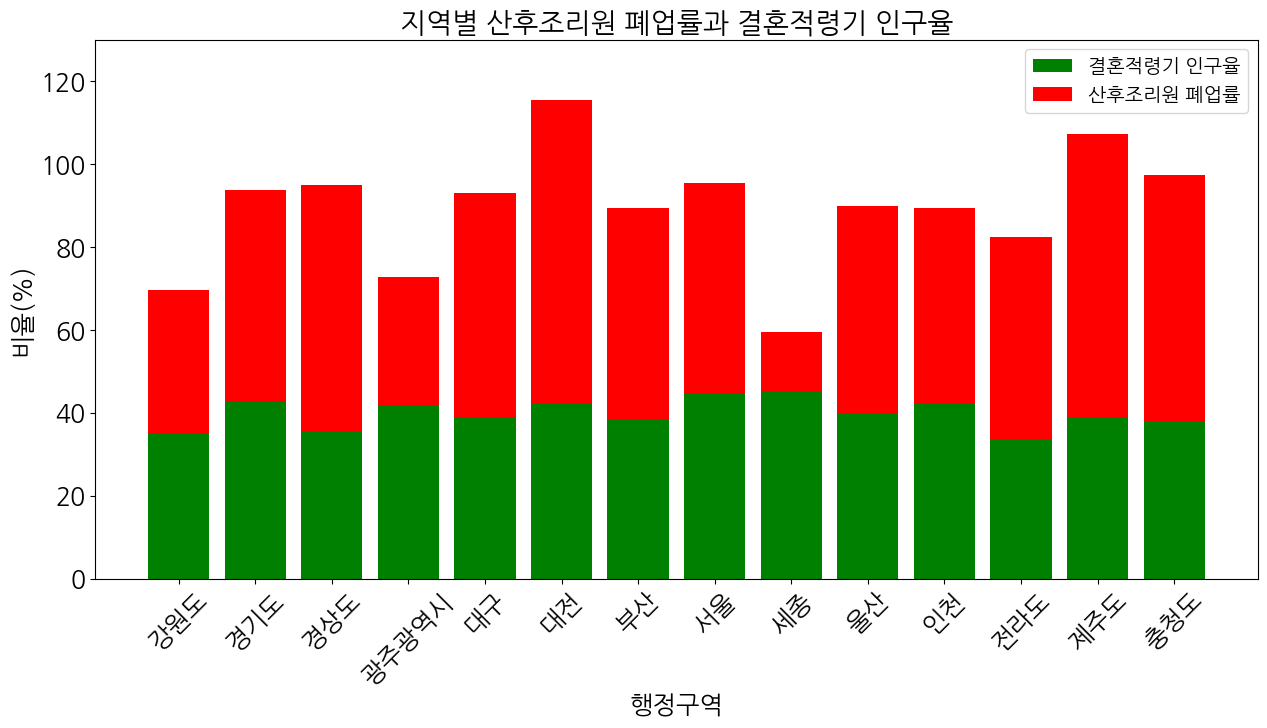

In [ ]:
plt.figure(figsize=(15,7))
plt.bar(dfT.local, dfT.rateMarriageableAge, color = 'green', label = '결혼적령기 인구율')
plt.bar(dfT.local, dfT.rateClosed, bottom = dfT.rateMarriageableAge, label = '산후조리원 폐업률', color = 'red')
plt.xticks(rotation = 45)
plt.title("지역별 산후조리원 폐업률과 결혼적령기 인구율", fontsize = 20)
plt.xlabel('행정구역')
plt.ylabel('비율(%)')
plt.ylim([0,130])
plt.legend(fontsize = 14)

plt.show()

In [ ]:
df2.columns

Index(['번호', '개방서비스명', '개방서비스아이디', '개방자치단체코드', '관리번호', '인허가일자', '인허가취소일자',
       '영업상태구분코드', '영업상태명', '상세영업상태코드', '상세영업상태명', '폐업일자', '휴업시작일자', '휴업종료일자',
       '재개업일자', '소재지전화', '소재지면적', '소재지우편번호', '소재지전체주소', '도로명전체주소', '도로명우편번호',
       '사업장명', '최종수정시점', '데이터갱신구분', '데이터갱신일자', '업태구분명', '좌표정보(x)', '좌표정보(y)',
       '임산부정원수', '영유아정원수', '임산부실면적', '영유아실면적', '모유수유실면적', '급식시설면적', '세탁실면적',
       '목욕실면적', '조리원화장실면적', '사무실면적', '간호사수', '간호조무사수', '영양사수', '취사부수', '미화원수',
       '기타인원수', '건물층수', '지상층수', '지하층수', 'Unnamed: 47', '시'],
      dtype='object')

In [ ]:
df3 = df2 [['도로명전체주소', '상세영업상태명', '영업상태명', '폐업일자', '재개업일자', '휴업시작일자', '휴업종료일자',
      '최종수정시점', '임산부정원수', '영유아정원수', '간호사수', '간호조무사수', '상세영업상태코드', '번호', '개방서비스명', '개방서비스아이디', '개방자치단체코드', '관리번호', '인허가일자', '인허가취소일자',
       '영업상태구분코드', '소재지전화', '소재지면적', '소재지우편번호', '소재지전체주소', '도로명우편번호',
       '사업장명', '데이터갱신구분', '데이터갱신일자', '업태구분명', '좌표정보(x)', '좌표정보(y)',
       '임산부실면적', '영유아실면적', '모유수유실면적', '급식시설면적', '세탁실면적',
       '목욕실면적', '조리원화장실면적', '사무실면적', '영양사수', '취사부수', '미화원수',
       '기타인원수', '건물층수', '지상층수', '지하층수', 'Unnamed: 47']]
df3.columns

Index(['도로명전체주소', '상세영업상태명', '영업상태명', '폐업일자', '재개업일자', '휴업시작일자', '휴업종료일자',
       '최종수정시점', '임산부정원수', '영유아정원수', '간호사수', '간호조무사수', '상세영업상태코드', '번호',
       '개방서비스명', '개방서비스아이디', '개방자치단체코드', '관리번호', '인허가일자', '인허가취소일자',
       '영업상태구분코드', '소재지전화', '소재지면적', '소재지우편번호', '소재지전체주소', '도로명우편번호', '사업장명',
       '데이터갱신구분', '데이터갱신일자', '업태구분명', '좌표정보(x)', '좌표정보(y)', '임산부실면적', '영유아실면적',
       '모유수유실면적', '급식시설면적', '세탁실면적', '목욕실면적', '조리원화장실면적', '사무실면적', '영양사수',
       '취사부수', '미화원수', '기타인원수', '건물층수', '지상층수', '지하층수', 'Unnamed: 47'],
      dtype='object')

In [ ]:
#특정 컬럼 삭제(1)
del_col = df3.loc[:,'상세영업상태코드':] #삭제할 컬럼 범위 설정('상세영업상코드'부터 끝까지)
del_col

#특정 컬럼 삭제(2)
df3.drop(del_col, axis=1, inplace=True)
df3

<ipython-input-19-6062febb3160>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop(del_col, axis=1, inplace=True)


,도로명전체주소,상세영업상태명,영업상태명,폐업일자,재개업일자,휴업시작일자,휴업종료일자,최종수정시점,임산부정원수,영유아정원수,간호사수,간호조무사수
0,서울특별시 석촌호수로 284 (현대레이크빌 2층),휴업,휴업,NaN,NaN,2021-05-21,2021-10-14,2021-05-21 14:53:26,19,19,4.0,10.0
1,경기도 용인시 기흥구 죽전로 2 (보정동),휴업,휴업,NaN,NaN,2015-08-24,2016-02-29,2015-08-24 14:00:45,16,16,3.0,14.0
2,"경기도 용인시 기흥구 죽전로 2, 현타워 9층 (보정동)",휴업,휴업,NaN,NaN,2023-04-15,2024-04-14,2023-04-14 15:22:42,19,21,3.0,2.0
3,"인천광역시 연수구 하모니로 124, 4층 (송도동)",휴업,휴업,NaN,NaN,2023-07-09,2024-07-09,2023-08-24 16:09:53,18,20,3.0,5.0
4,"전라북도 전주시 완산구 홍산로 245, 7~8층 (효자동2가)",휴업,휴업,NaN,NaN,2023-09-28,2023-10-31,2023-09-27 09:28:02,24,24,3.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...
965,경상남도 밀양시 백민로 36-1(내이동),영업중,영업/정상,NaN,NaN,NaN,NaN,2022-05-23 20:20:47,8,8,6.0,4.0
966,충청남도 천안시 서북구 서부대로 704 (두정동),직권폐업,취소/말소/만료/정지/중지,2020-12-30,NaN,NaN,NaN,2021-01-08 10:33:20,20,20,3.0,8.0
967,"경기도 용인시 기흥구 죽전로 20 (보정동,누리에뜰빌딩 3층)",직권폐업,취소/말소/만료/정지/중지,2021-12-03,NaN,NaN,NaN,2021-12-03 18:05:28,19,19,3.0,1.0
968,"부산광역시 수영구 황령대로481번길 7 (남천동, 남천동 한나산부인과)",직권폐업,취소/말소/만료/정지/중지,2021-09-06,NaN,NaN,NaN,2021-09-06 10:48:29,7,7,3.0,1.0


In [ ]:
#'도로명전체주소' 결측치(NaN) 제거
df3.dropna(subset=['도로명전체주소'])
df3.head()

,도로명전체주소,상세영업상태명,영업상태명,폐업일자,재개업일자,휴업시작일자,휴업종료일자,최종수정시점,임산부정원수,영유아정원수,간호사수,간호조무사수
0,서울특별시 석촌호수로 284 (현대레이크빌 2층),휴업,휴업,NaN,NaN,2021-05-21,2021-10-14,2021-05-21 14:53:26,19,19,4.0,10.0
1,경기도 용인시 기흥구 죽전로 2 (보정동),휴업,휴업,NaN,NaN,2015-08-24,2016-02-29,2015-08-24 14:00:45,16,16,3.0,14.0
2,"경기도 용인시 기흥구 죽전로 2, 현타워 9층 (보정동)",휴업,휴업,NaN,NaN,2023-04-15,2024-04-14,2023-04-14 15:22:42,19,21,3.0,2.0
3,"인천광역시 연수구 하모니로 124, 4층 (송도동)",휴업,휴업,NaN,NaN,2023-07-09,2024-07-09,2023-08-24 16:09:53,18,20,3.0,5.0
4,"전라북도 전주시 완산구 홍산로 245, 7~8층 (효자동2가)",휴업,휴업,NaN,NaN,2023-09-28,2023-10-31,2023-09-27 09:28:02,24,24,3.0,11.0


In [ ]:
local_df = pd.DataFrame([[18,10,0,28],[148,136,3,287],[41,42,0,83],
                         [8,6,0,14],[24,24,0,48],[8,23,0,31],
                         [23,25,2,51],[117,102,4,223],[6,2,0,8],
                         [7,2,0,9],[23,20,1,44],[25,17,1,43],
                         [7,12,0,19],[23,25,0,49]],
                        index=['강원도','경기도','경상도',
                               '광주광역시','대구','대전',
                               '부산','서울','세종',
                               '울산','인천','전라도',
                               '제주','충청도'],
                        columns=['working','closed','closing','total'])

local_df

,working,closed,closing,total
강원도,18,10,0,28
경기도,148,136,3,287
경상도,41,42,0,83
광주광역시,8,6,0,14
대구,24,24,0,48
대전,8,23,0,31
부산,23,25,2,51
서울,117,102,4,223
세종,6,2,0,8
울산,7,2,0,9


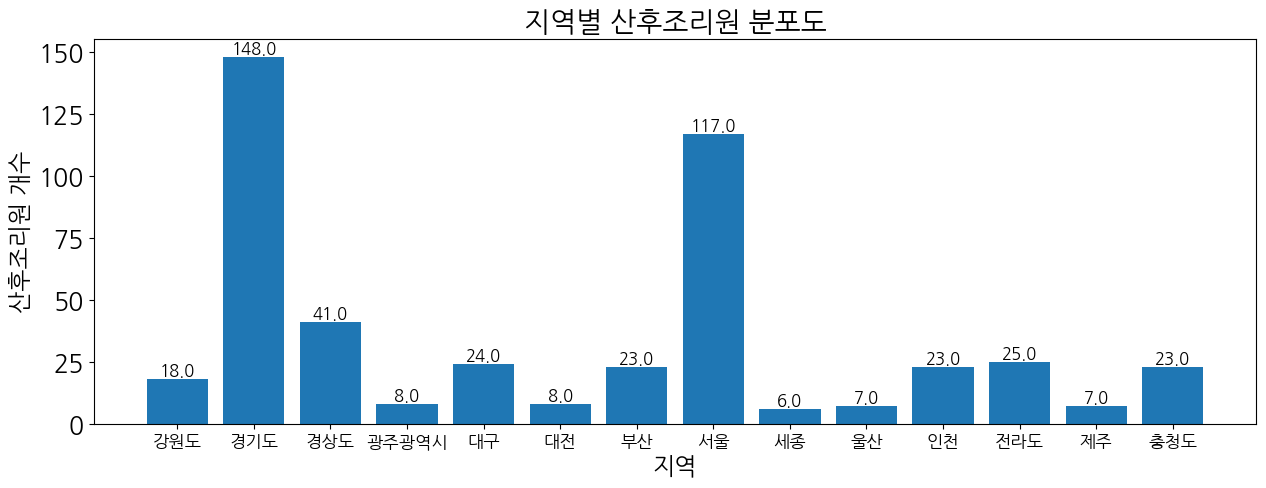

In [ ]:
plt.figure(figsize = (15,5))
plt.bar(local_df.index, local_df.working)
plt.title("지역별 산후조리원 분포도", fontsize = 20)
plt.xlabel("지역", fontsize = 17)
plt.ylabel("산후조리원 개수", fontsize = 17)
plt.xticks(fontsize = 12.5)

#그래프에 값 표시
for i in range(len(local_df.index)):
    height = local_df.working[i]
    plt.text(local_df.index[i], height + 0.25, '%.1f' %height, ha='center', va='bottom', size = 12)

plt.show()

In [ ]:
# 원하는 지역 리스트를 정의
selected_regions = ['강원도', '경기도', '경상도', '광주광역시', '대구', '대전', '부산', '서울', '세종', '울산', '인천', '전라도', '제주', '충청도']

# 선택한 지역의 영업, 폐업, '휴업 데이터 추출
selected_data = local_df.loc[selected_regions, ['영업', '폐업', '휴업']]

# 막대그래프(1)
# plot() 메서드를 이용해 시각화 생성, 'stacked=True'로 '영업', '폐업', '휴업'의 수치를 쌓아서 표시
selected_data.plot(kind='bar', stacked=True, color=['#e35f62', 'skyblue', 'green'], alpha=0.5)

# 그래프의 제목(타이틀)을 설정
plt.title('지역별 영업, 폐업, 휴업')

# 그래프의 x축 라벨 설정
plt.xlabel('지역')

# 그래프의 y축 라벨 설정
plt.ylabel('수')

# 그래프의 텍스트 설명
plt.legend(title='상태')

# 그래프 출력
plt.show()